In [1]:
import os
from collections import defaultdict
import torch
import numpy as np
import scipy.stats
from torch.distributions import constraints
from matplotlib import pyplot
import random

import pyro
import pyro.distributions as dist
from pyro import poutine
from pyro.infer.autoguide import AutoDelta
from pyro.optim import Adam
from pyro.infer import SVI, TraceEnum_ELBO, config_enumerate, infer_discrete, Predictive
from pyro.ops.indexing import Vindex
from pyro.infer import MCMC, NUTS

## Data preparation and cleaning
# importing required packages
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 30

import umap
import plotly
import plotly.graph_objs as go

import pickle

import torch.nn.functional as F

pyro.enable_validation(True)

Autosaving every 30 seconds


In [2]:
# importing in house modeling functions
import tomtom_models as tm
import tomtom_util as tu

# Data importing

In [2]:
# global tself_norm_all_3d, tself_norm_noauto_3d, tself_raw_all_3d, tself_raw_noauto_3d
# global ttarg_norm_all_3d, ttarg_norm_noauto_3d, ttarg_raw_all_3d, ttarg_raw_noauto_3d
# global tavg_norm_all_3d, tavg_norm_noauto_3d, tavg_raw_all_3d, tavg_raw_noauto_3d

# import pickled data
with open('../data/tomtom_data_preprocessed.pkl','rb') as f:
    [tself_norm_all_3d, tself_norm_noauto_3d, tself_raw_all_3d, tself_raw_noauto_3d,
    ttarg_norm_all_3d, ttarg_norm_noauto_3d, ttarg_raw_all_3d, ttarg_raw_noauto_3d,
    tavg_norm_all_3d, tavg_norm_noauto_3d, tavg_raw_all_3d, tavg_raw_noauto_3d] = pickle.load(f) 


In [17]:
with open('tomtom_fitted_models.pkl','wb') as f:
    pickle.dump([seeds_self_norm_all_grp,maps_self_norm_all_grp,logprobs_self_norm_all_grp,mem_self_norm_all_grp,
                 seeds_self_norm_all_dim,maps_self_norm_all_dim,logprobs_self_norm_all_dim,
                seeds_self_raw_noauto_grp,maps_self_raw_noauto_grp,logprobs_self_raw_noauto_grp,mem_self_raw_noauto_grp,
                seeds_self_raw_noauto_dim,maps_self_raw_noauto_dim,logprobs_self_raw_noauto_dim],f)

# Self ratings

## Normalized, with Autotransitions

### SVI

In [ ]:
# # Fitting dimensional model for self normed all
# tm.K = 2
# tm.mtype = 'dimensional'
# tm.target = 'self' # 'self','targ','avg'
# tm.dtype = 'norm' # 'norm','raw'
# tm.auto = 'all' # 'noauto','all'
# tm.stickbreak = False
# tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
# tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)
# # seed_self_norm_all, map_self_norm_all, mem_self_norm_all = tomtom_svi()
# seed_self_norm_all, map_self_norm_all = tm.tomtom_svi(tself_norm_all_3d) # must now pass data

In [12]:
# Fitting a priori K GROUP model on normed all data
tm.mtype = 'group'
tm.target = 'self' # 'self','targ','avg'
tm.dtype = 'norm' # 'norm','raw'
tm.auto = 'all' # 'noauto','all'
tm.stickbreak = False
tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)
seeds_self_norm_all_grp = []
maps_self_norm_all_grp = []
logprobs_self_norm_all_grp = []
for i in range(1,11):
    tm.K = i
    seed_self_norm_all_grp, map_self_norm_all_grp, mem_self_norm_all_grp, lp_self_norm_all_grp = tm.tomtom_svi(tself_norm_all_3d)
    seeds_self_norm_all_grp.append(seed_self_norm_all_grp)
    maps_self_norm_all_grp.append(map_self_norm_all_grp)
    logprobs_self_norm_all_grp.append(lp_self_norm_all_grp)

running SVI with: tself_norm_all_3d
seed = 30, initial_loss = 2419.382080078125
..............................
 final loss: -6295.9443359375

running SVI with: tself_norm_all_3d
seed = 18, initial_loss = 1607.314697265625
..............................
 final loss: -6748.9931640625

running SVI with: tself_norm_all_3d
seed = 83, initial_loss = 2155.863037109375
..............................
 final loss: -6685.5166015625

running SVI with: tself_norm_all_3d
seed = 26, initial_loss = 2448.491943359375
..............................
 final loss: -6648.802734375

running SVI with: tself_norm_all_3d
seed = 21, initial_loss = 1967.4444580078125
..............................
 final loss: -6669.41064453125

running SVI with: tself_norm_all_3d
seed = 25, initial_loss = 2386.956787109375
..............................
 final loss: -6579.0185546875

running SVI with: tself_norm_all_3d
seed = 27, initial_loss = 2261.238525390625
..............................
 final loss: -6409.99755859375

runn

In [13]:
# Fitting a priori K DIMENSIONAL model on normed all data
tm.mtype = 'dimensional'
tm.target = 'self' # 'self','targ','avg'
tm.dtype = 'norm' # 'norm','raw'
tm.auto = 'all' # 'noauto','all'
tm.stickbreak = False
tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)
seeds_self_norm_all_dim = []
maps_self_norm_all_dim = []
logprobs_self_norm_all_dim = []
for i in range(1,11):
    tm.K = i
    seed_self_norm_all_dim, map_self_norm_all_dim, lp_self_norm_all_dim = tm.tomtom_svi(tself_norm_all_3d)
    seeds_self_norm_all_dim.append(seed_self_norm_all_dim)
    maps_self_norm_all_dim.append(map_self_norm_all_dim)
    logprobs_self_norm_all_dim.append(lp_self_norm_all_dim)

running SVI with: tself_norm_all_3d
seed = 76, initial_loss = 2190.25830078125
..............................
 final loss: -6318.2724609375

running SVI with: tself_norm_all_3d
seed = 43, initial_loss = 2070.418212890625
..............................
 final loss: -6793.0859375

running SVI with: tself_norm_all_3d
seed = 21, initial_loss = 2324.71728515625
..............................
 final loss: -6585.80810546875

running SVI with: tself_norm_all_3d
seed = 10, initial_loss = 2667.426025390625
..............................
 final loss: -6640.2919921875

running SVI with: tself_norm_all_3d
seed = 95, initial_loss = 3140.47216796875
..............................
 final loss: -6748.56298828125

running SVI with: tself_norm_all_3d
seed = 43, initial_loss = 3780.763671875
..............................
 final loss: -6468.09765625

running SVI with: tself_norm_all_3d
seed = 19, initial_loss = 4564.8017578125
..............................
 final loss: -6273.3359375

running SVI with: ts

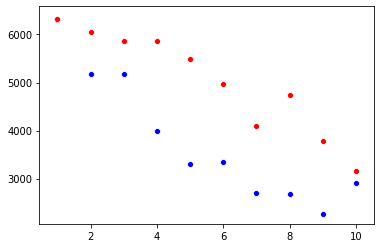

In [19]:
sns.scatterplot(range(1,11),logprobs_self_norm_all_grp, color = 'blue')
sns.scatterplot(range(1,11),logprobs_self_norm_all_dim, color = 'red')

In [23]:
logprobs_self_norm_all_grp

[tensor(6296.3193, grad_fn=<SubBackward0>),
 tensor(5168.0835, grad_fn=<SubBackward0>),
 tensor(5177.3237, grad_fn=<SubBackward0>),
 tensor(3985.4565, grad_fn=<SubBackward0>),
 tensor(3298.6538, grad_fn=<SubBackward0>),
 tensor(3342.2524, grad_fn=<SubBackward0>),
 tensor(2707.2732, grad_fn=<SubBackward0>),
 tensor(2686.3379, grad_fn=<SubBackward0>),
 tensor(2264.9980, grad_fn=<SubBackward0>),
 tensor(2912.4363, grad_fn=<SubBackward0>)]

In [ ]:
# seed_self_norm_all, map_self_norm_all, mem_self_norm_all = tomtom_svi()
seed_self_norm_all, map_self_norm_all = tm.tomtom_svi(tself_norm_all_3d) # must now pass data

In [ ]:
# fig = plt.figure()
# nrow = 15
# ncol = 5
# for i in np.arange(nrow):
#     for j in np.arange(ncol):
# #         print('i: {}, j:{}'.format(i,j))
#         img_ind = i*ncol + j + 1
# #         print(img_ind)
#         ax = fig.add_subplot(ncol,nrow,img_ind)
#         sns.distplot(tself_norm_all_3d[:,i,j],ax = ax)
# plt.show()

draw_density_better(map_self_norm_all, mem_self_norm_all)

### MCMC

In [ ]:
posterior_samples_self_norm_all = tomtom_mcmc(seed_self_norm_all)
posterior_samples_self_norm_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_self_norm_all['weights'][:,1]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Normalized, no Autotransitions

### SVI

In [ ]:
K = 10
target = 'self' # 'self','targ','avg'
norm = 'norm' # 'norm','raw'
auto = 'noauto' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
# seed_self_norm_noauto, map_self_norm_noauto, mem_self_norm_noauto = tomtom_svi()
seed_self_raw_noauto, map_self_raw_noauto = tomtom_svi()

In [ ]:
map_self_raw_noauto['participant_topics']

In [ ]:
draw_density_better(map_self_norm_noauto, mem_self_norm_noauto)

### MCMC

In [ ]:
posterior_samples_self_norm_noauto = tomtom_mcmc(seed_self_norm_noauto)
posterior_samples_self_norm_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_self_norm_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Raw, with autotransitions

### SVI

In [ ]:
K = 10
target = 'self' # 'self','targ','avg'
norm = 'raw' # 'norm','raw'
auto = 'all' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_self_raw_all, map_self_raw_all, mem_self_raw_all = tomtom_svi()

In [ ]:
draw_density_better(map_self_raw_all, mem_self_raw_all)

### MCMC

In [ ]:
posterior_samples_self_raw_all = tomtom_mcmc(seed_self_raw_all)
posterior_samples_self_raw_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_self_raw_all['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Raw, without autotransitions

### SVI

In [ ]:
tm.K = 2
tm.mtype = 'dimensional'
tm.target = 'self' # 'self','targ','avg'
tm.dtype = 'raw' # 'norm','raw'
tm.auto = 'noauto' # 'noauto','all'
tm.stickbreak = False
tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [27]:
tm.mtype = 'group'
tm.target = 'self' # 'self','targ','avg'
tm.dtype = 'raw' # 'norm','raw'
tm.auto = 'noauto' # 'noauto','all'
tm.stickbreak = False
tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)
seeds_self_raw_noauto_grp = []
maps_self_raw_noauto_grp = []
logprobs_self_raw_noauto_grp = []
for i in range(1,11):
    tm.K = i
    seed_self_raw_noauto_grp, map_self_raw_noauto_grp, mem_self_raw_noauto_grp, lp_self_raw_noauto_grp = tm.tomtom_svi(tself_raw_noauto_3d)
    seeds_self_raw_noauto_grp.append(seed_self_norm_all)
    maps_self_raw_noauto_grp.append(map_self_norm_all)
    logprobs_self_raw_noauto_grp.append(lp_self_raw_noauto_grp)

running SVI with: tself_raw_noauto_3d
seed = 68, initial_loss = 17190.09375
..............................
 final loss: -937.40185546875

running SVI with: tself_raw_noauto_3d
seed = 7, initial_loss = 17220.7578125
..............................
 final loss: -1183.563720703125

running SVI with: tself_raw_noauto_3d
seed = 63, initial_loss = 16388.033203125
..............................
 final loss: -1032.6170654296875

running SVI with: tself_raw_noauto_3d
seed = 28, initial_loss = 17416.228515625
..............................
 final loss: -859.587158203125

running SVI with: tself_raw_noauto_3d
seed = 74, initial_loss = 17766.087890625
..............................
 final loss: -708.15966796875

running SVI with: tself_raw_noauto_3d
seed = 31, initial_loss = 17875.974609375
..............................
 final loss: -670.018798828125

running SVI with: tself_raw_noauto_3d
seed = 29, initial_loss = 17596.248046875
..............................
 final loss: -417.380859375

running 

In [15]:
tm.mtype = 'dimensional'
tm.target = 'self' # 'self','targ','avg'
tm.dtype = 'raw' # 'norm','raw'
tm.auto = 'noauto' # 'noauto','all'
tm.stickbreak = False
tm.optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
tm.elbo = TraceEnum_ELBO(max_plate_nesting=1)
seeds_self_raw_noauto_dim = []
maps_self_raw_noauto_dim = []
logprobs_self_raw_noauto_dim = []
for i in range(1,11):
    tm.K = i
    seed_self_raw_noauto_dim, map_self_raw_noauto_dim, lp_self_raw_noauto_dim = tm.tomtom_svi(tself_raw_noauto_3d)
    seeds_self_raw_noauto_dim.append(seed_self_norm_all)
    maps_self_raw_noauto_dim.append(map_self_norm_all)
    logprobs_self_raw_noauto_dim.append(lp_self_raw_noauto_dim)

running SVI with: tself_raw_noauto_3d
seed = 40, initial_loss = 16849.259765625
..............................
 final loss: -941.41552734375

running SVI with: tself_raw_noauto_3d
seed = 2, initial_loss = 17414.65625
..............................
 final loss: -1292.98681640625

running SVI with: tself_raw_noauto_3d
seed = 37, initial_loss = 16926.279296875
..............................
 final loss: -1246.4873046875

running SVI with: tself_raw_noauto_3d
seed = 92, initial_loss = 17298.724609375
..............................
 final loss: -1007.9080810546875

running SVI with: tself_raw_noauto_3d
seed = 58, initial_loss = 18017.8359375
..............................
 final loss: -1027.5987548828125

running SVI with: tself_raw_noauto_3d
seed = 21, initial_loss = 18911.669921875
..............................
 final loss: -477.6788330078125

running SVI with: tself_raw_noauto_3d
seed = 47, initial_loss = 19669.296875
..............................
 final loss: -591.779296875

running S

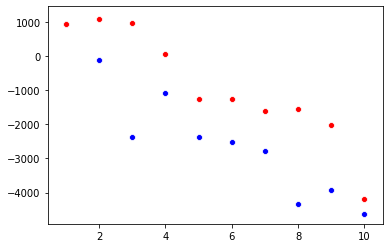

In [28]:
sns.scatterplot(range(1,11), logprobs_self_raw_noauto_grp, color = 'blue')
sns.scatterplot(range(1,11), logprobs_self_raw_noauto_dim, color = 'red')

In [26]:
logprobs_self_raw_noauto_grp

[tensor([[0]]),
 tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
         1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
 tensor([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
         1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
         1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0]),
 tensor([1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 3, 1, 3, 2, 2, 1, 3,
         3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1,
         3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
         3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 1, 1, 1]),
 tensor([0, 0, 0, 2, 0, 

In [ ]:
# seed_self_raw_noauto, map_self_raw_noauto, mem_self_raw_noauto = tomtom_svi()
seed_self_raw_noauto, map_self_raw_noauto = tm.tomtom_svi(tself_raw_noauto_3d)

In [ ]:
map_self_raw_noauto

### MCMC

In [ ]:
posterior_samples_self_raw_noauto = tomtom_mcmc(seed_self_raw_noauto)
posterior_samples_self_raw_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_self_raw_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

# Target-specific ratings

## Visual Inspections

In [ ]:
random.seed(200506)
# umap visualization
# rudimentary test run of umap on self transition data
fit_trans_targ_default = umap.UMAP()
u_trans_targ_default = fit_trans_targ_default.fit_transform(trans_targ)

In [ ]:
plt.scatter(u_trans_targ_default[:,0],u_trans_targ_default[:,1])

In [ ]:
fit_trans_targ_neighbor30 = umap.UMAP(n_neighbors=30,min_dist=0.05)
u_trans_targ_neighbor30 = fit_trans_targ_neighbor30.fit_transform(trans_targ)
plt.scatter(u_trans_targ_neighbor30[:,0],u_trans_targ_neighbor30[:,1])

In [ ]:
# pca to see how many dimensions best capture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
trans_targ_scaled = scaler.fit_transform(trans_targ)
decomp = PCA()
trans_targ_pca = decomp.fit(trans_targ_scaled)
plt.scatter(list(range(np.shape(trans_targ_pca.explained_variance_ratio_)[0])),np.array(trans_targ_pca.explained_variance_ratio_))

In [ ]:
# above pca result suggests 4-6 factors
# here we construct a new umap object with 3 dimensions and visulize it to see if there are obv clusters
fit_trans_targ_3d = umap.UMAP(n_neighbors=47,min_dist=0,n_components=3)
u_trans_targ_3d = fit_trans_targ_3d.fit_transform(trans_targ)

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

trace = go.Scatter3d(
    x=u_trans_targ_3d[:,0],  # <-- Put your data instead
    y=u_trans_targ_3d[:,1],  # <-- Put your data instead
    z=u_trans_targ_3d[:,2],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        #'color': ,
    }
)
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)
data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
# Render the plot.
plotly.offline.iplot(plot_figure)

## Target specific ratings, normalized, with autotransitions

### SVI

In [ ]:
K = 10
target = 'targ' # 'self','targ','avg'
norm = 'norm' # 'norm','raw'
auto = 'all' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_targ_norm_all, map_targ_norm_all, mem_targ_norm_all = tomtom_svi()

In [ ]:
draw_density(map_targ_norm_all, mem_targ_norm_all)

### MCMC

In [ ]:
posterior_samples_targ_norm_all = tomtom_mcmc(seed_targ_norm_all)
posterior_samples_targ_norm_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_targ_norm_all['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Target specific ratings, normalized, No autotransitions

### SVI

In [ ]:
K = 10
target = 'targ' # 'self','targ','avg'
norm = 'norm' # 'norm','raw'
auto = 'noauto' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_targ_norm_noauto, map_targ_norm_noauto, mem_targ_norm_noauto = tomtom_svi()

In [ ]:
draw_density(map_targ_norm_noauto, mem_targ_norm_noauto)

### MCMC

In [ ]:
posterior_samples_targ_norm_noauto = tomtom_mcmc(seed_targ_norm_noauto)
posterior_samples_targ_norm_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_targ_norm_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Target specific ratings, Raw, with autotransitions

### SVI

In [ ]:
K = 10
target = 'targ' # 'self','targ','avg'
norm = 'raw' # 'norm','raw'
auto = 'all' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_targ_raw_all, map_targ_raw_all, mem_targ_raw_all = tomtom_svi()

In [ ]:
draw_density(map_targ_raw_all, mem_targ_raw_all)

### MCMC

In [ ]:
posterior_samples_targ_raw_all = tomtom_mcmc(seed_targ_raw_all)
posterior_samples_targ_raw_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_targ_raw_all['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Target specific ratings, Raw, No autotransitions

### SVI

In [ ]:
K = 10
target = 'targ' # 'self','targ','avg'
norm = 'raw' # 'norm','raw'
auto = 'noauto' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_targ_raw_noauto, map_targ_raw_noauto, mem_targ_raw_noauto = tomtom_svi()

In [ ]:
draw_density(map_targ_raw_noauto, mem_targ_raw_noauto)

### MCMC

In [ ]:
posterior_samples_targ_raw_noauto = tomtom_mcmc(seed_targ_raw_noauto)
posterior_samples_targ_raw_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_targ_raw_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

# Group level ratings

## Visual Inspections

In [ ]:
random.seed(200506)
# umap visualization
# rudimentary test run of umap on self transition data
fit_trans_avg_default = umap.UMAP()
u_trans_avg_default = fit_trans_avg_default.fit_transform(trans_avg)

In [ ]:
plt.scatter(u_trans_avg_default[:,0],u_trans_avg_default[:,1])

In [ ]:
fit_trans_avg_neighbor30 = umap.UMAP(n_neighbors=30,min_dist=0.05)
u_trans_avg_neighbor30 = fit_trans_avg_neighbor30.fit_transform(trans_avg)
plt.scatter(u_trans_avg_neighbor30[:,0],u_trans_avg_neighbor30[:,1])

In [ ]:
# pca to see how many dimensions best capture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
trans_avg_scaled = scaler.fit_transform(trans_avg)
decomp = PCA()
trans_avg_pca = decomp.fit(trans_avg_scaled)
plt.scatter(list(range(np.shape(trans_avg_pca.explained_variance_ratio_)[0])),np.array(trans_avg_pca.explained_variance_ratio_))

In [ ]:
# above pca result suggests 4-6 factors
# here we construct a new umap object with 3 dimensions and visulize it to see if there are obv clusters
fit_trans_avg_3d = umap.UMAP(n_neighbors=47,min_dist=0,n_components=3)
u_trans_avg_3d = fit_trans_avg_3d.fit_transform(trans_avg)

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

trace = go.Scatter3d(
    x=u_trans_avg_3d[:,0],  # <-- Put your data instead
    y=u_trans_avg_3d[:,1],  # <-- Put your data instead
    z=u_trans_avg_3d[:,2],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        #'color': ,
    }
)
# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)
data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
# Render the plot.
plotly.offline.iplot(plot_figure)

## Group level ratings, normalized, with autotransitions

### SVI

In [ ]:
K = 10
target = 'avg' # 'self','targ','avg'
norm = 'norm' # 'norm','raw'
auto = 'all' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_avg_norm_all, map_avg_norm_all, mem_avg_norm_all = tomtom_svi()

In [ ]:
draw_density(map_avg_norm_all, mem_avg_norm_all)

### MCMC

In [ ]:
posterior_samples_avg_norm_all = tomtom_mcmc(seed_avg_norm_all)
posterior_samples_avg_norm_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_avg_norm_all['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Group level ratings, normalized, No autotransitions

### SVI

In [ ]:
K = 10
target = 'avg' # 'self','targ','avg'
norm = 'norm' # 'norm','raw'
auto = 'noauto' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_avg_norm_noauto, map_avg_norm_noauto, mem_avg_norm_noauto = tomtom_svi()

In [ ]:
draw_density(map_avg_norm_noauto, mem_avg_norm_noauto)

### MCMC

In [ ]:
posterior_samples_avg_norm_noauto = tomtom_mcmc(seed_avg_norm_noauto)
posterior_samples_avg_norm_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_avg_norm_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Group level ratings, Raw, with autotransitions

### SVI

In [ ]:
K = 10
target = 'avg' # 'self','targ','avg'
norm = 'raw' # 'norm','raw'
auto = 'all' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_avg_raw_all, map_avg_raw_all, mem_avg_raw_all = tomtom_svi()

In [ ]:
draw_density(map_avg_raw_all, mem_avg_raw_all)

### MCMC

In [ ]:
posterior_samples_avg_raw_all = tomtom_mcmc(seed_avg_raw_all)
posterior_samples_avg_raw_all['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_avg_raw_all['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

## Group level ratings, Raw, No autotransitions

### SVI

In [ ]:
K = 10
target = 'avg' # 'self','targ','avg'
norm = 'raw' # 'norm','raw'
auto = 'noauto' # 'noauto','all'
optim = pyro.optim.Adam({'lr': 0.0005, 'betas': [0.8, 0.99]})
elbo = TraceEnum_ELBO(max_plate_nesting=1)

In [ ]:
seed_avg_raw_noauto, map_avg_raw_noauto, mem_avg_raw_noauto = tomtom_svi()

In [ ]:
draw_density(map_avg_raw_noauto, mem_avg_raw_noauto)

### MCMC

In [ ]:
posterior_samples_avg_raw_noauto = tomtom_mcmc(seed_avg_raw_noauto)
posterior_samples_avg_raw_noauto['weights'].shape

In [ ]:
#X = posterior_samples['concentration'][:,0,0,0]
X = posterior_samples_avg_raw_noauto['weights'][:,0]

#pyplot.figure(figsize=(8, 8), dpi=100).set_facecolor('white')
pyplot.plot(np.arange(X.numpy().size),X.numpy())
#pyplot.contour(np.log(h + 3).T, extent=[xs.min(), xs.max(), ys.min(), ys.max()],
#               colors='white', alpha=0.8)
pyplot.title('Sampling trace of top left concentration with NUTS')
pyplot.ylabel('Sample value')
pyplot.xlabel('Step')
pyplot.tight_layout()

# Topic model-y tryout

In [ ]:
@config_enumerate()
def model_topic(data):
    num_topics = 2
    nrow = data.shape[1]
    ncol = data.shape[2]
    print(nrow,ncol)

    with pyro.plate('topic', num_topics):
        # sample a weight and value for each topic
        topic_weights = pyro.sample("topic_weights", dist.Gamma(1. / num_topics, 1.))
        topic_concentrations = pyro.sample("topic_values", dist.Gamma(2 * torch.ones(nrow,ncol), 1/3 * torch.ones(nrow,ncol)).to_event(2))
        print('topic weights', topic_weights.shape)
        print('topic values', topic_concentrations.shape)

    with pyro.plate('participants', data.shape[0]):
        # sample each participant's idiosyncratic topic mixture
        participant_topics = pyro.sample("participant_topics", dist.Dirichlet(topic_weights))
        print('participant topics', participant_topics.shape)
        
        transition_topics = pyro.sample("transition_topics", dist.Categorical(participant_topics),
                                        infer={"enumerate": "parallel"})
        print('topics')
        print('transition topics', transition_topics.shape)

        out = dist.Dirichlet(topic_concentrations[transition_topics]).to_event(1)
        print('observation batch:', out.batch_shape)
        print('observation event:', out.event_shape)
        print('data', data.shape)
        data = pyro.sample("obs", dist.Dirichlet(topic_concentrations[transition_topics]),
                    obs=data)
        print(data)

In [ ]:
model_topic(tself_norm_all_3d)